# Homework 7 - Log Scale
In this homework, we will be using different datasets to explore the use of log scales in visualizations. Logarithmic scales are useful when dealing with data that spans several orders of magnitude and ratio-based comparisons. By the end of this assignment, you will create visualizations using log scales and interpret the results.


## Instructions

1. **Project Setup**:  
   - Set up your Python and Jupyter (or VSCode) environment.  
   - Clone or download the repository provided in class (refer to the class notes).

2. **Fill the cells**:
    - Fill in the cells with the code provided in the instructions.
    - You can use the provided code as a starting point and modify it as needed.
    - Make sure to run the code in each cell to see the output.
    - Also respond the markdown questions in the notebook where indicated.

3. **Documentation**:  
   - Comment your code and add markdown explanations for each part of your analysis.

4. **Submission**:  
   - Save your notebook and export as either PDF or HTML. If the visualizations using altair are not being shown in the html, submit a separated version with altair html. Refer to: https://altair-viz.github.io/getting_started/starting.html#publishing-your-visualization (you can use the `chart.save('chart_file.html')` method).
   - Submit to Canvas.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as ss

## Ratio and logarithm

If you use linear scale to visualize ratios, it can be quite misleading. As learned in the class, ratio values larger than 1 can vary between 1 and infinite, while ratio values smaller than 1 can vary only between 0 and 1. For instance, the ratios of 100:1 (100/1) or 1000:1 (1000/1) are represented as 100 and 1000. The corresponding distances from 1:1 (1) are 99 and 999, respectively. On the other hand, the ratios of 1:100 (1/100) or 1:1000 (1/1000) are represented as 0.01 and 0.001. The corresponding distances from 1:1 (1) are 0.99 and 0.999, respectively. In other words, there is no symmetry between symmetric ratios!

To see this clearly, let's first create some ratios.

In [2]:
x = np.array([1,    1,   1,  1, 10, 100, 1000])
y = np.array([1000, 100, 10, 1, 1,  1,   1   ])
ratio = x/y
print(ratio)

[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


**Q: Plot on the linear scale using the [`scatter()`](http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html) function. Also draw a horizontal line at ratio=1 for a reference. The x-axis will be simply the data ID that refers to each ratio data point. Y-axis will be the ratio values.**

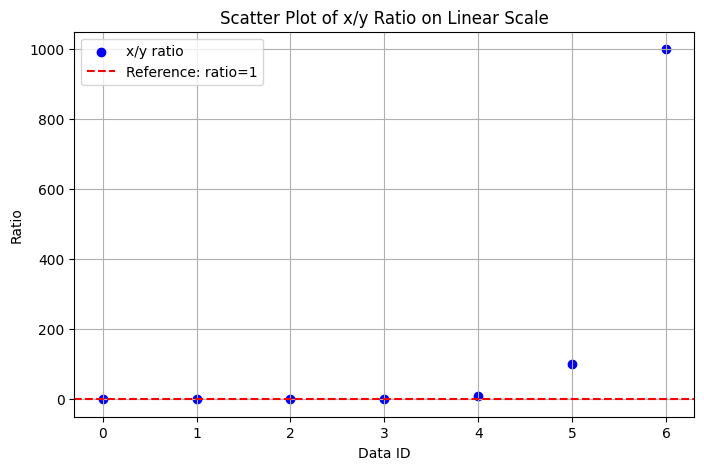

In [3]:
X = np.arange(len(ratio))

# YOUR SOLUTION HERE
# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X, ratio, color='blue', label='x/y ratio')

# Horizontal line at ratio = 1
plt.axhline(y=1, color='red', linestyle='--', label='Reference: ratio=1')

# Labels and grid
plt.title("Scatter Plot of x/y Ratio on Linear Scale")
plt.xlabel("Data ID")
plt.ylabel("Ratio")
plt.legend()
plt.grid(True)
plt.show()

**Q: Is this a good visualization of the ratio data? Why? Why not? Explain.**

# YOUR SOLUTION HERE

**Q: Can you fix it?**

This is a decent starting point, but not the most effective visualization for this ratio data. While the scatter plot on a linear scale clearly shows the presence of outliers and allows us to reference the ratio=1 line, it doesn’t effectively highlight the structure of the data because of the extreme variation in ratio values. In this case, the ratio ranges from 0.001 to 1000, which creates a skewed plot where smaller values are compressed and hard to interpret.



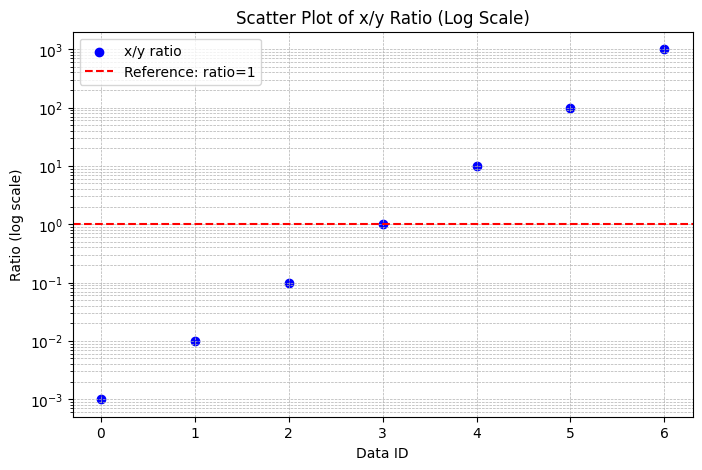

In [4]:
# YOUR SOLUTION HERE
plt.figure(figsize=(8, 5))
plt.scatter(X, ratio, color='blue', label='x/y ratio')

# Horizontal line at ratio = 1
plt.axhline(y=1, color='red', linestyle='--', label='Reference: ratio=1')

# Set y-axis to log scale
plt.yscale('log')

# Labels and grid
plt.title("Scatter Plot of x/y Ratio (Log Scale)")
plt.xlabel("Data ID")
plt.ylabel("Ratio (log scale)")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

## Log-binning

One way to draw a histogram in log-scale, with a broadly distributed data, is by using log-binning.

Let's first see what happens if we do not use the log scale for a dataset with a heavy tail.

**Q: Load the movie dataset from our Datasets folderand remove the NaN rows based on the following columns: `IMDB Rating`, `IMDB Votes`, `Worldwide Gross`, `Rotten Tomatoes Rating`.**

In [5]:
movies = pd.read_json("/content/movies.json") # adjust the path as needed

# YOUR SOLUTION HERE
print("Original dataset shape:", movies.shape)

# Drop rows with NaNs in the specified columns
columns_to_check = ['IMDB Rating', 'IMDB Votes', 'Worldwide Gross', 'Rotten Tomatoes Rating']
movies_cleaned = movies.dropna(subset=columns_to_check)

# Display new shape
print("Cleaned dataset shape:", movies_cleaned.shape)

Original dataset shape: (3201, 16)
Cleaned dataset shape: (2256, 16)


If you simply call `hist()` method with a dataframe object, it identifies all the numeric columns and draw a histogram for each.

**Q: draw all possible histograms of the movie dataframe. Adjust the size of the plots if needed.**

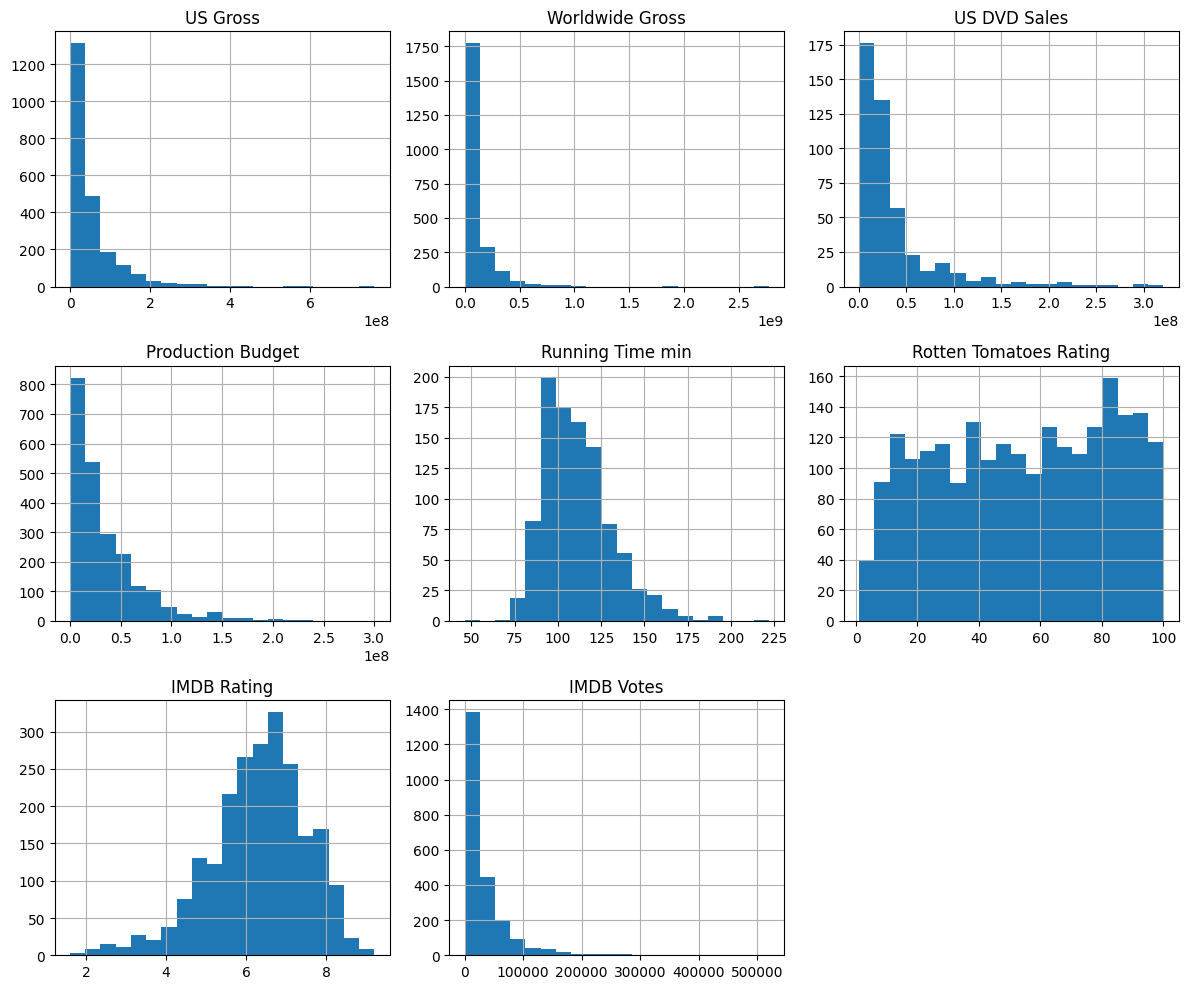

In [8]:
# YOUR SOLUTION HERE
movies_cleaned.hist(bins=20, figsize=(12, 10))

# Show plots
plt.tight_layout()
plt.show()

As we can see, a majority of the columns are not normally distributed. In particular, if you look at the worldwide gross variable, you only see a couple of meaningful data from the histogram. Is this a problem of resolution? How about increasing the number of bins?

Text(0, 0.5, 'Frequency')

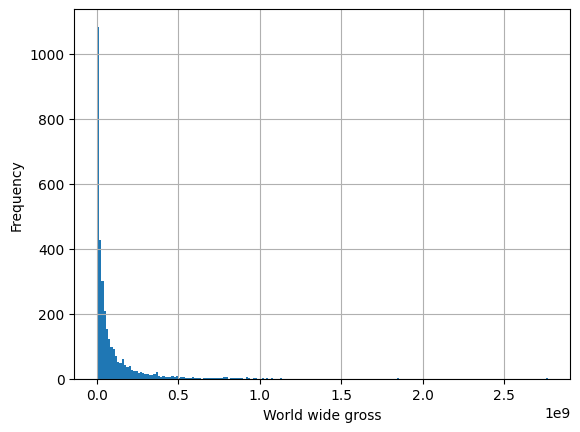

In [9]:
ax = movies["Worldwide Gross"].hist(bins=200)
ax.set_xlabel("World wide gross")
ax.set_ylabel("Frequency")

Maybe a bit more useful, but it doesn't tell anything about the data distribution above certain point. How about changing the vertical scale to logarithmic scale?

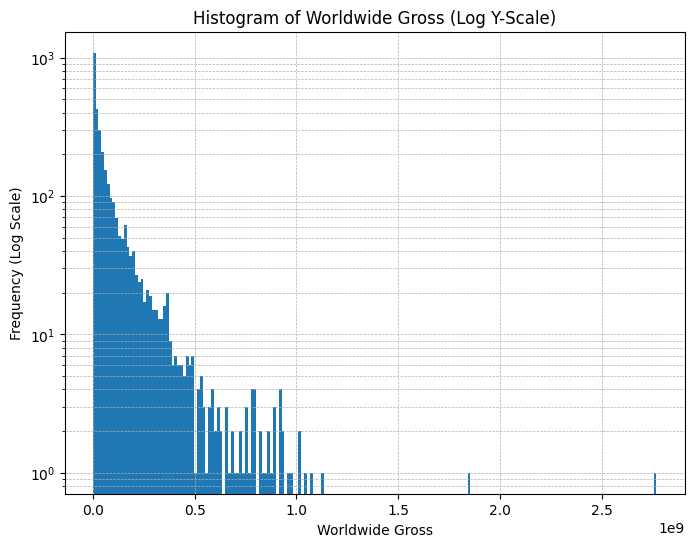

In [12]:
# YOUR SOLUTION HERE
import matplotlib.pyplot as plt

# Plot histogram with many bins and a log-scaled y-axis
ax = movies["Worldwide Gross"].hist(bins=200, figsize=(8, 6))
ax.set_yscale("log")  # 🔥 THIS is the key move
ax.set_xlabel("Worldwide Gross")
ax.set_ylabel("Frequency (Log Scale)")
ax.set_title("Histogram of Worldwide Gross (Log Y-Scale)")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


Now, let's try log-bin. Recall that when plotting histgrams we can specify the edges of bins through the `bins` parameter. For example, we can specify the edges of bins to [1, 2, 3, ... , 10] as follows.


<Axes: >

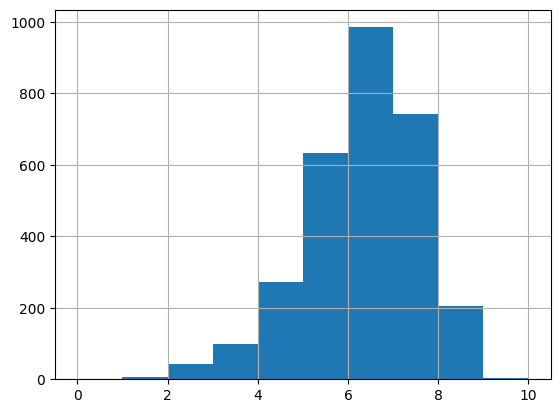

In [13]:
movies["IMDB Rating"].hist(bins=range(0,11))

Here, we can specify the edges of bins in a similar way. Instead of specifying on the linear scale, we do it on the log space. Some useful resources:

* [Google query: python log-bin](https://www.google.com/search?q=python+log+binning)
* [numpy.logspace](https://numpy.org/doc/stable/reference/generated/numpy.logspace.html)
* [numpy.linspace vs numpy.logspace](https://stackoverflow.com/questions/31480033/difference-in-output-between-numpy-linspace-and-numpy-logspace)

Hint: since $10^{\text{start}}= \text{min(Worldwide Gross)}$, $\text{start} = \log_{10}(\text{min(Worldwide Gross)})$

In [14]:
min(movies["Worldwide Gross"])

0.0

Because there seems to be movie(s) that made $0, and because log(0) is undefined & log(1) = 0, let's add 1 to the variable.  

In [15]:
movies["Worldwide Gross"] = movies["Worldwide Gross"]+1.0

In [17]:
# TODO: specify the edges of bins using np.logspace
# bins = ...

# YOUR SOLUTION HERE
start = np.log10(1)
stop = np.log10(movies["Worldwide Gross"].max())
bins = np.logspace(start, stop, 20)

# Confirm it looks right
print(bins)

[1.00000000e+00 3.14018485e+00 9.86076088e+00 3.09646119e+01
 9.72346052e+01 3.05334634e+02 9.58807191e+02 3.01083182e+03
 9.45456845e+03 2.96890926e+04 9.32292387e+04 2.92757043e+05
 9.19311230e+05 2.88680720e+06 9.06510822e+06 2.84661155e+07
 8.93888645e+07 2.80697558e+08 8.81442219e+08 2.76789150e+09]


Now we can plot a histgram with log-bin. Set both axis to be log-scale.

Text(0, 0.5, 'Frequency')

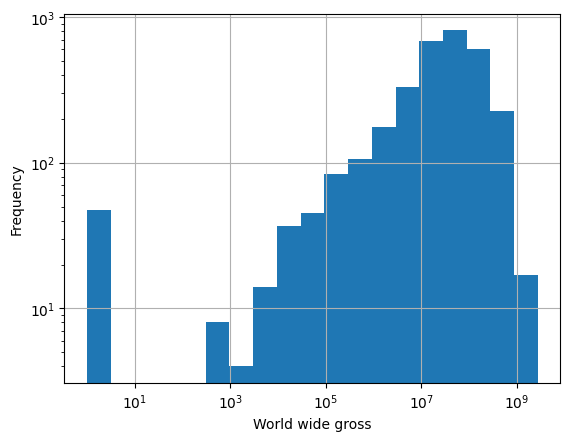

In [18]:
ax = (movies["Worldwide Gross"]+1.0).hist(bins=bins)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("World wide gross")
ax.set_ylabel("Frequency")

What is going on? Is this the right plot?

**Q: explain and fix**

The plot isn't quite capture the true distribution of the data because it displays probability density rather than raw frequency counts. This can be particularly misleading when using logarithmic binning, where bins vary in width. In such cases, the height of each bar represents the count divided by the total number of observations, and then further divided by the bin width. Since the widths of log-spaced bins span multiple orders of magnitude, this normalization causes wider bins—despite containing more data—to appear shorter than they should.

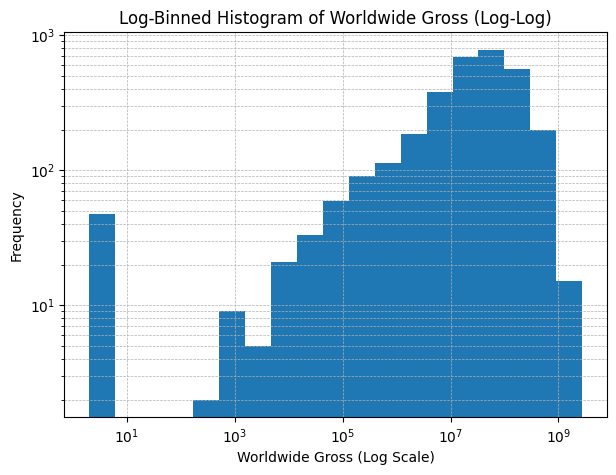

In [20]:
# YOUR SOLUTION HERE
# Add 1 to avoid log(0)
gross_plus1 = movies["Worldwide Gross"] + 1.0

# Create log-spaced bins
start = np.log10(gross_plus1.min())
stop = np.log10(gross_plus1.max())
bins = np.logspace(start, stop, 20)

# Plot using matplotlib to control everything
plt.figure(figsize=(7, 5))
plt.hist(gross_plus1, bins=bins, density=False)  # <<< RAW COUNT
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Worldwide Gross (Log Scale)")
plt.ylabel("Frequency")
plt.title("Log-Binned Histogram of Worldwide Gross (Log-Log)")
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


## CCDF

The cumulative distribution function $F_X(x)$ at $x$ is defined by

$$F_X(x) = P(X \le x),$$

which is, in other words, the probability that $X$ takes a value less than or equal to $x$. When empirically calculated (empirical CDF), $F_X(x)$ is the fraction of data points that are less than or equal to $x$. CDF allows us to examine any percentile of the data distribution and is also useful for comparing distributions.

However, when the data spans multiple orders of magnitude, CDF may not be useful. Let's try.

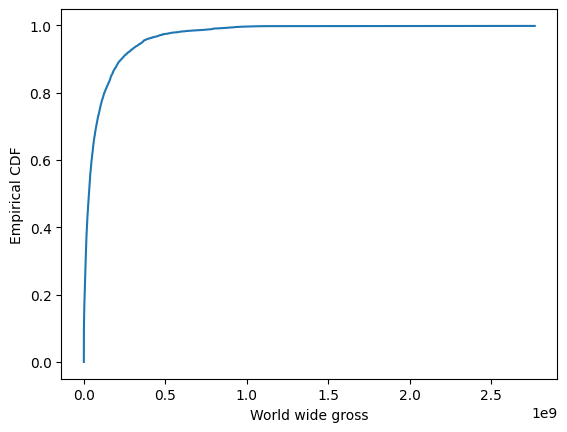

In [21]:
gross_sorted = movies["Worldwide Gross"].sort_values()
N = len(gross_sorted)
Y = np.linspace(1/N, 1, num=N)
plt.xlabel("World wide gross")
plt.ylabel("Empirical CDF")
_ = plt.plot(gross_sorted, Y)

Although the movies that are interesting are those with large worldwide gross, we don't see any details about their distribution as they are all close to 1. In other words, CDF sucks at revealing the details of the tail.

CCDF is a nice alternative to examine distributions with heavy tails. The idea is same as CDF, but the direction of aggregation is opposite. Because we are starting from the largest value, it can reveal the details of those large values (tail).

CCDF is defined as follows:

$$ \bar{F}_X(x) = P(X > x)$$

And thus,

$$ \bar{F}_X(x) = P(X > x) = 1 - F_X(x)$$

In other words, we can use CDF to calculate CCDF.

**Q: draw CCDF using the CDF code above.**

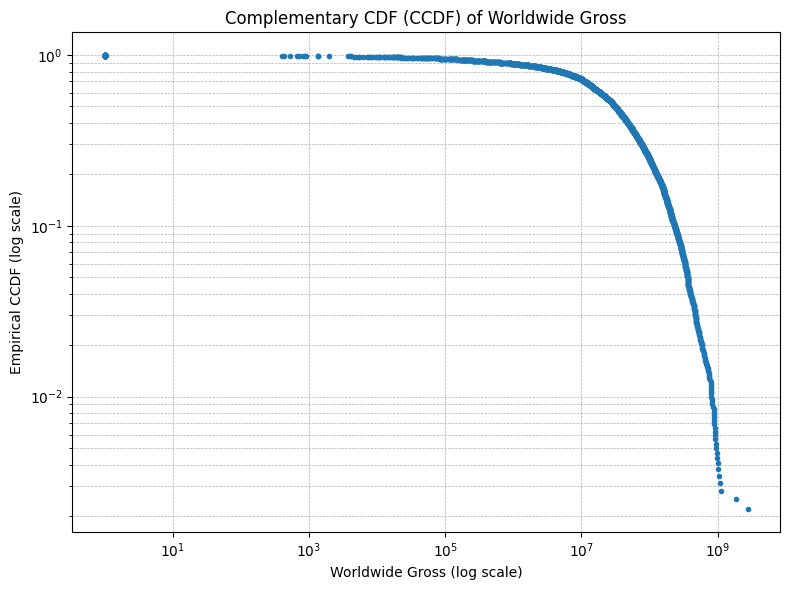

In [24]:
# YOUR SOLUTION HERE
gross_sorted = movies["Worldwide Gross"].sort_values()
N = len(gross_sorted)

# Compute Empirical CDF values
Y = np.linspace(1/N, 1, num=N)

# Compute CCDF as 1 - CDF
ccdf = 1 - Y

# Plot CCDF with log-log scale
plt.figure(figsize=(8, 6))
plt.plot(gross_sorted, ccdf, marker='.', linestyle='none')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Worldwide Gross (log scale)")
plt.ylabel("Empirical CCDF (log scale)")
plt.title("Complementary CDF (CCDF) of Worldwide Gross")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()




How about making the y axis in log scale?

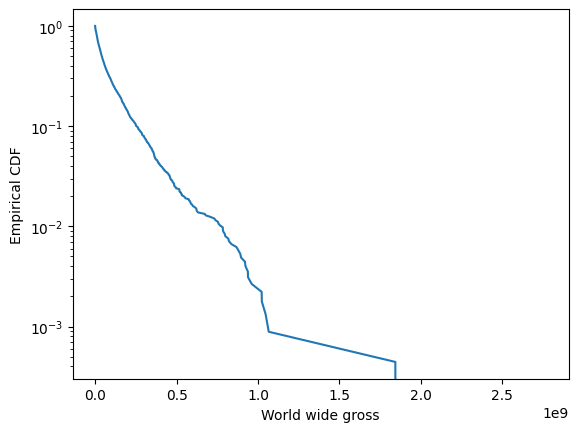

In [ ]:
# YOUR SOLUTION HERE

Although this is technically the correct CCDF plot, there is a very subtle issue. Do you see the vertical line at the rightmost side of the CCDF plot? To understand what's going on, let's look at the Y values of this plot. We used 1 - CDF to calculate CCDF. So,

In [ ]:
1 - Y

array([9.99556738e-01, 9.99113475e-01, 9.98670213e-01, ...,
       8.86524823e-04, 4.43262411e-04, 0.00000000e+00])

What happens when we take the log of these values?

In [ ]:
np.log(1-Y)

/var/folders/d0/wgh1l_5905x4crqpp1b7whz40000gn/T/ipykernel_89007/1767632406.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(1-Y)


array([-4.43360681e-04, -8.86918018e-04, -1.33067219e-03, ...,
       -7.02820143e+00, -7.72134861e+00,            -inf])

Because the last value of 1 - Y is 0.0, we got `-inf` as the log value. That means, the largest value's (let's say $x$) coordinate in our CCDF plot will be $(x, -inf)$ if we use a log scale for our y-axis. And thus we will not be able to see it in the plot. This occurs because we are drawing CDF in a simplified way. In reality, ECDF and ECCDF are step functions and this shouldn't matter. However, because we are drawing a line between the points, we are getting this issue.

This is somewhat problematic because the largest value in our dataset can be quite important and therefore we want to see it in the plot!

This is why, in practice, we sometimes use "incorrect" version of CCDF. We can consider $\bar{F}_X(x)$ as a "flipped" version of CDF.

$$ \bar{F}_X(x) = P(X \ge x) $$

instead of

$$ \bar{F}_X(x) = P(X > x) $$

In doing so, we can see the largest value in the data in our CCDF plot. We can also draw the correct version of CCDF, but this quick-and-dirty version is often easier and good enough to show what we want to show.

A simple way is just to define the y coordinates as follows:


In [ ]:
Y = np.linspace( 1.0, 1/N, num=N)


**Q: Draw a CCDF of worldwide gross data. Use log scale for y-axis.**

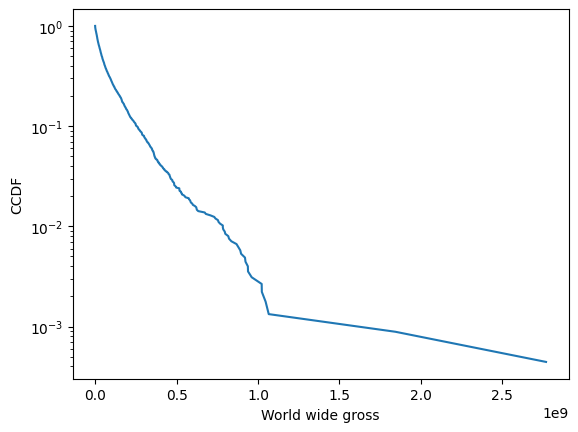

In [ ]:
# YOUR SOLUTION HERE

A straight line in semilog scale means exponential decay (cf. a straight line in log-log scale means power-law decay). So it seems like the amount of money a movie makes across the world follows *roughly* an exponential distribution, while there are some outliers that make insane amount of money.

**Q: Which is the most successful movie in our dataset?**

You can use the following

- `idxmax()`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.idxmax.html
- `loc`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html

In [ ]:
# YOUR SOLUTION HERE

Title                                  Avatar
US_Gross                          760167650.0
Worldwide_Gross                  2767891500.0
US_DVD_Sales                      146153933.0
Production_Budget                 237000000.0
Release_Date                      Dec 18 2009
MPAA_Rating                             PG-13
Running_Time_min                          NaN
Distributor                  20th Century Fox
Source                    Original Screenplay
Major_Genre                            Action
Creative_Type                 Science Fiction
Director                        James Cameron
Rotten_Tomatoes_Rating                   83.0
IMDB_Rating                               8.3
IMDB_Votes                           261439.0
Name: 1234, dtype: object

## Part 2: Ukraine-Russia Conflict Tweets
Now let's see some social media data. Tweets about the Ukraine-Russia conflict.

We load the dataset, define data types for specific columns, and display a sample of the data.
The analysis will include Visualizing the distribution of the 'RetweetCount' field.

In [ ]:
dtypes = {
    "Tweet Id" : "str",
    "ConversationId": "str",
}
df_ukraine = pd.read_csv('../../Datasets/Ukraine_tweets.csv',dtype=dtypes)
df_ukraine.head()

/var/folders/jh/xkyk5yn976z_y46xvbg2kjjm0000gn/T/ipykernel_19221/3066181497.py:5: DtypeWarning: Columns (0,2,3,4,5,6,7,11,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ukraine = pd.read_csv('../../Datasets/Ukraine_tweets.csv',dtype=dtypes)


,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2022-02-24 03:12:47+00:00,1496684505247141897,🇺🇦 Massive explosions rocks #Kharkiv. #Russia ...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,2.0,17.0,47.0,1.0,1496493071495987201,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,"['#Kharkiv.', '#Russia', '#Ukraine', '#Ukraine...",9.0
1,2022-02-24 03:18:54+00:00,1496686044275695616,🇺🇦 Kharkiv is officially being struck by major...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,2.0,104.0,188.0,8.0,1496493071495987201,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0
2,2022-02-24 03:22:42+00:00,1496687000375726080,🇺🇦 More angles on that strike in Kharkiv. #Rus...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,1.0,41.0,75.0,5.0,1496493071495987201,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0
3,2022-02-24 03:25:36+00:00,1496687731434565636,🇺🇦 BM-21 Grad strikes opening on #Mariupol cit...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,21.0,407.0,1099.0,149.0,1496493071495987201,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Mariupol', '#Russia', '#Ukraine', '#Ukraine...",9.0
4,2022-02-24 03:27:28+00:00,1496688201242759177,🇺🇦 Damage caused by strike in Kharkiv... #Russ...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,7.0,152.0,207.0,22.0,1496493071495987201,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0


**Q: Why do you need to define data types for specific columns?**

**`YOUR SOLUTION HERE`**

Let's visualize the distribution of the number of times a tweet was retweeted.

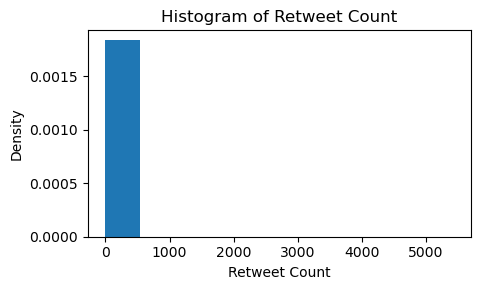

In [ ]:
# distribution of number of retweets
plt.figure(figsize=(5, 3))
retweetCount = df_ukraine['RetweetCount'].dropna() # Remove missing values
plt.hist(retweetCount, density=True)
plt.xlabel('Retweet Count')
plt.ylabel('Density')
plt.title('Histogram of Retweet Count')
plt.tight_layout()
plt.show()

# increase number of bins

**Q: What is the problem with this plot?**

**`YOUR SOLUTION HERE`**

Let's try to use a log-log scale to visualize the distribution of retweet counts.

In [ ]:
# distribution of number of retweets
plt.figure(figsize=(5, 3))
retweetCount = df_ukraine['RetweetCount'].dropna() # Remove missing values
bins = _ # YOUR SOLUTION HERE: specify the bins using np.logspace! Try a few different number of bins (suggested: ~21)
plt.hist(retweetCount, density=_, bins=bins) # YOUR SOLUTION HERE. Do we need to specify density or not? Which value?
# YOUR SOLUTION HERE: specify log scale for x-axis and y-axis

# Don't forget to name the axes and title the plot
plt.tight_layout()
plt.show()

We can also use a circles instead of bars. This way, we can see the distribution more clearly.

In [ ]:
# distribution of number of retweets
plt.figure(figsize=(5, 3))
bins = _ # YOUR SOLUTION HERE: specify the bins using np.logspace or use those from the previous histogram
hist, bins = np.histogram(retweetCount, bins=_, density=_) # YOUR SOLUTION HERE
centerBins = 0.5 * (bins[1:] + bins[:-1]) # get the center of each bin for plotting
plt.plot(centerBins, hist, "o ", ms=4) # Plotting the histogram using the center of bins
# YOUR SOLUTION HERE: specify log scale for x-axis and y-axis and add labels
plt.tight_layout()
plt.show()


**Q: What do you see now?**

**`YOUR SOLUTION HERE`**

**Q: Can you guess what this distribution looks like?**

**`YOUR SOLUTION HERE`**

**Q: What are the chracteristics of this distribution type?**

**`YOUR SOLUTION HERE`**

**Q: Can you guess why this distribution type may appear in social media metrics such as retweet count?**

**`YOUR SOLUTION HERE`**

**Q: Can you give examples where it may appear?**

**`YOUR SOLUTION HERE`**
